In [1]:
import cv2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G_a = nx.Graph()
G_a.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
G_a.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('B', 'G'), ('C','D'), ('D','E'), ('D','F'), ('E','F'), ('B', 'F')])

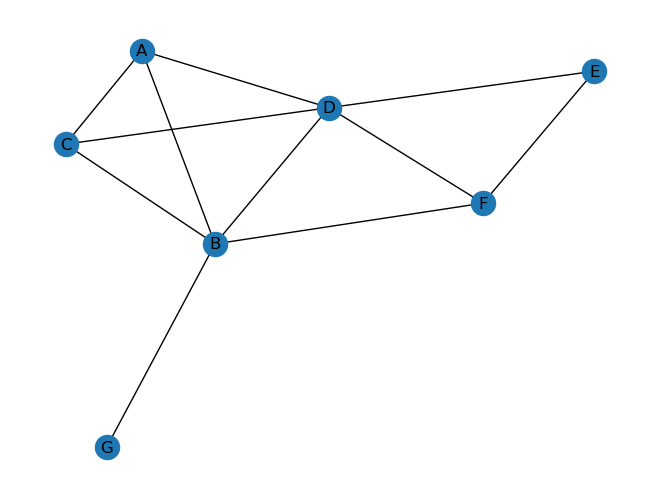

In [3]:
nx.draw(G_a, with_labels= True)
plt.savefig('GraphA.png')

In [4]:
G_b = nx.Graph()
G_b.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
G_b.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('E', 'F')])

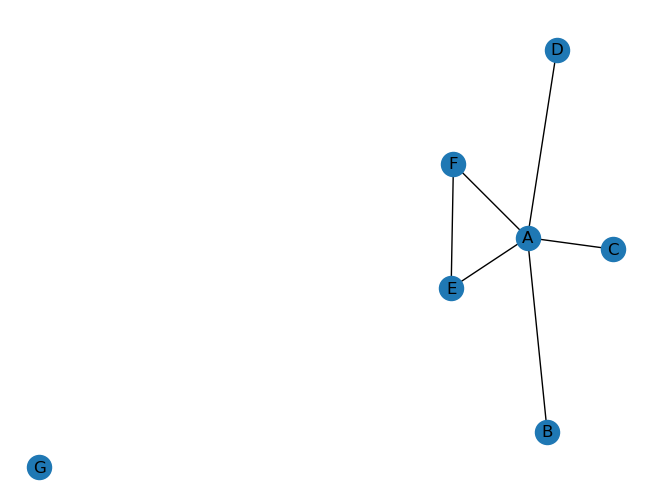

In [5]:
nx.draw(G_b, with_labels= True)
plt.savefig('GraphB.png')

In [6]:
A_edges = G_a.edges

In [7]:
A_edges

EdgeView([('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('B', 'G'), ('B', 'F'), ('C', 'D'), ('D', 'E'), ('D', 'F'), ('E', 'F')])

In [8]:
# Question1: Degree
deg_a = {j: 0 for j in ['A','B','C','D','E','F','G']}

for j in ['A','B','C','D','E','F','G']:
    for i in A_edges:
        if (j == i[0]) or (j == i[1]):
            deg_a[j] += 1
    print('Degree of', f'{j}', ': ', f'{deg_a[j]}')

Degree of A :  3
Degree of B :  5
Degree of C :  3
Degree of D :  5
Degree of E :  2
Degree of F :  3
Degree of G :  1


In [9]:
# Question1: Degree
B_edges = G_b.edges
deg_b = {j: 0 for j in ['A','B','C','D','E','F','G']}

for j in ['A','B','C','D','E','F','G']:
    for i in B_edges:
        if (j == i[0]) or (j == i[1]):
            deg_b[j] += 1
    print('Degree of', f'{j}', ': ', f'{deg_b[j]}')

Degree of A :  5
Degree of B :  1
Degree of C :  1
Degree of D :  1
Degree of E :  2
Degree of F :  2
Degree of G :  0


In [10]:
deg_a

{'A': 3, 'B': 5, 'C': 3, 'D': 5, 'E': 2, 'F': 3, 'G': 1}

In [11]:
# Question2 Proof

# m = A_edges
k_i = 0
for i in ['A','B','C','D','E','F','G']:
    k_i += deg_a[i]
if k_i == 2*len(list(A_edges)):
    print('It is true that k_i = 2m')


It is true that k_i = 2m


In [12]:
# Question3: Average degree of a graph

print('Average degree of graph A:', (2*len(list(A_edges)))/(nx.number_of_nodes(G_a)))
print('Average degree of graph B:', (2*len(list(B_edges)))/(nx.number_of_nodes(G_b)))

Average degree of graph A: 3.142857142857143
Average degree of graph B: 1.7142857142857142


In [13]:
# Question4: Density of a graph

print('Density of graph A:', (2*len(list(A_edges)))/(nx.number_of_nodes(G_a)*(nx.number_of_nodes(G_a)-1)))
print('Density of graph B:', (2*len(list(B_edges)))/(nx.number_of_nodes(G_b)*(nx.number_of_nodes(G_b)-1)))

Density of graph A: 0.5238095238095238
Density of graph B: 0.2857142857142857


In [14]:
# Question5: Clustering coefficients for nodes in a graph

# For graph_A
# find a list of neighbours of node A
len_nbr = {j: 0 for j in ['A','B','C','D','E','F','G']}
nbr = {j: [] for j in ['A','B','C','D','E','F','G']}
for j in ['A','B','C','D','E','F','G']:
    for i in range(len(list(A_edges))):
        if (list(A_edges))[i][0] == j or (list(A_edges))[i][1] == j:
            len_nbr[j] += 1
            if (list(A_edges))[i][0] == j:
                nbr[j] += (list(A_edges))[i][1]
            elif (list(A_edges))[i][1] == j:
                nbr[j] += (list(A_edges))[i][0]


# if a combination of edges between nodes in that list exists, do += 1 to list of edges between neighbours
from itertools import combinations
nbr_edges = {j: 0 for j in ['A','B','C','D','E','F','G']}
for j in ['A','B','C','D','E','F','G']:
    for i in list(combinations(nbr[j],2)):
        if i in list(A_edges):
            nbr_edges[j] += 1
            
for j in ['A','B','C','D','E','F','G']:
    if (len(list(combinations(nbr[j],2)))) != 0:
        print('Clustering coefficient of node ', f'{j} is: {nbr_edges[j]/(len(list(combinations(nbr[j],2))))}')
    else:
        print('Clustering coefficient of node ', f'{j} is: 0')

# similarly for graph_B

Clustering coefficient of node  A is: 1.0
Clustering coefficient of node  B is: 0.4
Clustering coefficient of node  C is: 1.0
Clustering coefficient of node  D is: 0.5
Clustering coefficient of node  E is: 1.0
Clustering coefficient of node  F is: 0.6666666666666666
Clustering coefficient of node  G is: 0


In [15]:
A = nx.adjacency_matrix(G_a).todense()
A

array([[0, 1, 1, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0]], dtype=int32)

In [16]:
A_adj = np.array([[0, 1, 1, 1, 0, 0, 0],
                   [1, 0, 1, 1, 0, 1, 1],
                   [1, 1, 0, 1, 0, 0, 0],
                   [1, 1, 1, 0, 1, 1, 0],
                   [0, 0, 0, 1, 0, 1, 0],
                   [0, 1, 0, 1, 1, 0, 0],
                   [0, 1, 0, 0, 0, 0, 0]])
A_adj

array([[0, 1, 1, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [17]:
# Question6: Finding matrix for shortest distance between any two nodes in the graph

# find shortest distance only for elements in the array that are not on diagonal OR (is != 1 AND not on diagonal)
num_rows, num_cols = A_adj.shape
shortest_paths = A_adj.astype(float)
# Loop through the matrix
for i in range(num_rows):
    for j in range(num_cols):
        # Check if the current element is not on the diagonal and not equal to 1, set all those elements to infinity
        if i != j and A_adj[i][j] != 1:
            shortest_paths[i][j] = np.inf
            
#print(shortest_paths)

# for all these 0 values that are not on diagonal, find shortest path using any algorithm, here we used Floyd-Warshall algorithm
#path_arr = {j: [] for j in ['A','B','C','D','E','F','G']}
for k in range(len(A_adj)):
    for i in range(num_rows):
        for j in range(num_cols):
                    if shortest_paths[k][j] + shortest_paths[i][k] < shortest_paths[i][j]:
                        shortest_paths[i][j] = shortest_paths[i][k] + shortest_paths[k][j]
                        
                
print('Shortest paths matrix for graph A:') 
print(shortest_paths.astype(int)) 

# Question7: Finding out No.of connected components in a graph
count = 0
number_cc = 1 # assuming that all of the nodes are connected
for j in range(num_cols):
    for i in range(num_rows):
        if i != j and shortest_paths[i][j] == np.inf:
            count += 1
            if count > 0 and count == len(A_adj)-1:
                number_cc += 1
print('No.of connected components in graph A: ', number_cc)

# Question8: Finding the diameter of a graph
longest_paths = A_adj.astype(float)
arr = np.array([])
for k in range(len(A_adj)):
    for i in range(num_rows):
        for j in range(num_cols):
                    if i!=j and longest_paths[k][j] + longest_paths[i][k] > longest_paths[i][j]:
                        arr = np.append(arr,longest_paths[k][j] + longest_paths[i][k])
                        #print(arr.astype(int))
    longest_paths[i][j] = np.max(arr)
    
# print(longest_paths.astype(int))

print('Diameter of graph A is: ', np.max(longest_paths.astype(int)))

# Question10: Finding Characteristic path length of a graph
#keys = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G'}
d_ij = 0
for i in range(num_rows):
        for j in range(num_cols):
            if shortest_paths[i][j] > 0 and shortest_paths[i][j] == shortest_paths[j][i]:
                d_ij += shortest_paths[i][j]/2
import math
# Calculate 7C2
combinations = math.factorial(7) // (math.factorial(2) * math.factorial(7 - 2))
print('Characteristic path length of graph A is: ', d_ij/combinations)

# Question11: Finding closeness centrality of nodes in a graph
d_ij_new = {j: 0 for j in ['A','B','C','D','E','F','G']}
key = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}
for k in ['A','B','C','D','E','F','G']:
    d_ij_new[k] = 0
    for i in range(num_rows):
            for j in range(num_cols):
                if i!=j and shortest_paths[i][j] > 0 and shortest_paths[i][j] == shortest_paths[j][i] and (i==key[k] or j==key[k]):
                    d_ij_new[k] += shortest_paths[i][j]/2
    closeness_centrality = (num_rows - 1) / d_ij_new[k] if d_ij_new[k] != 0 else 0
    print(f'Closeness centrality of node {k} is: {closeness_centrality}')

# Question12
d_ij_new = {j: 0 for j in ['A','B','C','D','E','F', 'G']}
key = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}
for k in ['A','B','C','D','E','F','G']:
    d_ij_new[k] = 0
    for i in range(num_rows):
            for j in range(num_cols):
                if i!=j and shortest_paths[i][j] > 0 and shortest_paths[i][j] == shortest_paths[j][i] and (i==key[k] or j==key[k]):
                    d_ij_new[k] += 1/(shortest_paths[i][j])
    N_closeness_centrality = (1/(7-1))*(d_ij_new[k]/2)
    print(f"Newmann's closeness centrality of node {k} is: {N_closeness_centrality}")

Shortest paths matrix for graph A:
[[0 1 1 1 2 2 2]
 [1 0 1 1 2 1 1]
 [1 1 0 1 2 2 2]
 [1 1 1 0 1 1 2]
 [2 2 2 1 0 1 3]
 [2 1 2 1 1 0 2]
 [2 1 2 2 3 2 0]]
No.of connected components in graph A:  1
Diameter of graph A is:  3
Characteristic path length of graph A is:  1.5238095238095237
Closeness centrality of node A is: 0.6666666666666666
Closeness centrality of node B is: 0.8571428571428571
Closeness centrality of node C is: 0.6666666666666666
Closeness centrality of node D is: 0.8571428571428571
Closeness centrality of node E is: 0.5454545454545454
Closeness centrality of node F is: 0.6666666666666666
Closeness centrality of node G is: 0.5
Newmann's closeness centrality of node A is: 0.75
Newmann's closeness centrality of node B is: 0.9166666666666666
Newmann's closeness centrality of node C is: 0.75
Newmann's closeness centrality of node D is: 0.9166666666666666
Newmann's closeness centrality of node E is: 0.6388888888888888
Newmann's closeness centrality of node F is: 0.75
Newmann's

In [18]:
B = nx.adjacency_matrix(G_b).todense()
B

array([[0, 1, 1, 1, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [19]:
B_adj = np.array([[0, 1, 1, 1, 1, 1, 0],
               [1, 0, 0, 0, 0, 0, 0],
               [1, 0, 0, 0, 0, 0, 0],
               [1, 0, 0, 0, 0, 0, 0],
               [1, 0, 0, 0, 0, 1, 0],
               [1, 0, 0, 0, 1, 0, 0],
               [0, 0, 0, 0, 0, 0, 0]])
# Similarly, for graph B:

# find shortest distance only for elements in the array that are not on diagonal OR (is != 1 AND not on diagonal)
num_rows, num_cols = B_adj.shape
shortest_paths = B_adj.astype(float)
# Loop through the matrix
for i in range(num_rows):
    for j in range(num_cols):
        # Check if the current element is not on the diagonal and not equal to 1, set all those elements to infinity
        if i != j and B_adj[i][j] != 1:
            shortest_paths[i][j] = np.inf
            
#print(shortest_paths)

# for all these 0 values that are not on diagonal, find shortest path using any algorithm, here we used Floyd-Warshall algorithm
for k in range(len(B_adj)):
    for i in range(num_rows):
        for j in range(num_cols):
                    if shortest_paths[k][j] + shortest_paths[i][k] < shortest_paths[i][j]:
                        shortest_paths[i][j] = shortest_paths[i][k] + shortest_paths[k][j]
            
print('Shortest paths matrix for graph B:') 
print(shortest_paths) 

# Question7: Finding out No.of connected components in a graph
count = 0
number_cc = 1 # assuming that all of the nodes are connected
for j in range(num_cols):
    for i in range(num_rows):
        if i != j and shortest_paths[i][j] == np.inf:
            count += 1
            if count > 0 and count == len(B_adj)-1:
                number_cc += 1
print('No.of connected components in graph B: ', number_cc)

# Question8: Finding the diameter of a graph
longest_paths = B_adj.astype(float)
arr = np.array([])
for k in range(len(B_adj)):
    for i in range(num_rows):
        for j in range(num_cols):
                    if i!=j and longest_paths[i][j] != np.inf and longest_paths[k][j] + longest_paths[i][k] > longest_paths[i][j]:
                        arr = np.append(arr,longest_paths[k][j] + longest_paths[i][k])
                        #print(arr.astype(int))
    longest_paths[i][j] = np.max(arr)
    
# print(longest_paths.astype(int))

print('Diameter of graph B is: ', np.max(longest_paths.astype(int)))

# Question10: Finding Characteristic path length of a graph
#keys = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G'}
d_ij = 0
for i in range(num_rows):
        for j in range(num_cols):
            if shortest_paths[i][j] > 0 and shortest_paths[i][j] != np.inf and shortest_paths[i][j] == shortest_paths[j][i]:
                d_ij += shortest_paths[i][j]/2
import math
# Calculate 6C2
combinations = math.factorial(6) // (math.factorial(2) * math.factorial(6 - 2))
print('Characteristic path length of graph B is: ', d_ij/combinations)  

# Question11: Finding closeness centrality of nodes in a graph
d_ij_new = {j: 0 for j in ['A','B','C','D','E','F']}
key = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5}
for k in ['A','B','C','D','E','F']:
    d_ij_new[k] = 0
    for i in range(num_rows-1):
            for j in range(num_cols-1):
                if i!=j and shortest_paths[i][j] > 0 and shortest_paths[i][j] == shortest_paths[j][i] and (i==key[k] or j==key[k]):
                    d_ij_new[k] += shortest_paths[i][j]/2
    closeness_centrality = (num_rows - 1) / d_ij_new[k] if d_ij_new[k] != 0 else 0
    print(f'Closeness centrality of node {k} is: {closeness_centrality}')

# Question12
d_ij_new = {j: 0 for j in ['A','B','C','D','E','F', 'G']}
key = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}
for k in ['A','B','C','D','E','F','G']:
    d_ij_new[k] = 0
    for i in range(num_rows):
            for j in range(num_cols):
                if i!=j and shortest_paths[i][j] > 0 and shortest_paths[i][j] == shortest_paths[j][i] and (i==key[k] or j==key[k]):
                    d_ij_new[k] += 1/(shortest_paths[i][j])
    N_closeness_centrality = (1/(7-1))*(d_ij_new[k]/2)
    print(f"Newmann's closeness centrality of node {k} is: {N_closeness_centrality}")

Shortest paths matrix for graph B:
[[ 0.  1.  1.  1.  1.  1. inf]
 [ 1.  0.  2.  2.  2.  2. inf]
 [ 1.  2.  0.  2.  2.  2. inf]
 [ 1.  2.  2.  0.  2.  2. inf]
 [ 1.  2.  2.  2.  0.  1. inf]
 [ 1.  2.  2.  2.  1.  0. inf]
 [inf inf inf inf inf inf  0.]]
No.of connected components in graph B:  2
Diameter of graph B is:  2
Characteristic path length of graph B is:  1.6
Closeness centrality of node A is: 1.2
Closeness centrality of node B is: 0.6666666666666666
Closeness centrality of node C is: 0.6666666666666666
Closeness centrality of node D is: 0.6666666666666666
Closeness centrality of node E is: 0.75
Closeness centrality of node F is: 0.75
Newmann's closeness centrality of node A is: 0.8333333333333333
Newmann's closeness centrality of node B is: 0.5
Newmann's closeness centrality of node C is: 0.5
Newmann's closeness centrality of node D is: 0.5
Newmann's closeness centrality of node E is: 0.5833333333333333
Newmann's closeness centrality of node F is: 0.5833333333333333
Newmann's c

In [20]:
# Question9:  difference between diameter and characteristic path length 
''' CPL measure is more reflective of network navigability and behaviour, compared to
diameter. Diameter captures only the distance between a single pair of vertices—that are
farthest from one another in the graph. '''

' CPL measure is more reflective of network navigability and behaviour, compared to\ndiameter. Diameter captures only the distance between a single pair of vertices—that are\nfarthest from one another in the graph. '